# Stock Trades by Members of the US House of Representatives

This project uses public data about the stock trades made by members of the US House of Representatives. This data is collected and maintained by Timothy Carambat as part of the [House Stock Watcher](https://housestockwatcher.com/) project. The project describes itself as follows:

> With recent and ongoing investigations of incumbent congressional members being investigated for potentially violating the STOCK act. This website compiles this publicly available information in a format that is easier to digest then the original PDF source.
>
> Members of Congress must report periodic reports of their asset transactions. This website is purely for an informative purpose and aid in transparency.
>
> This site does not manipluate or censor any of the information from the original source. All data is transcribed by our community of contributors, which you can join for free by going to our transcription tool. Our moderation team takes great care in ensuring the accuracy of the information.
>
> This site is built and maintained by Timothy Carambat and supported with our contributors.

Some interesting questions to consider for this data set include:

- Is there a difference in stock trading behavior between political parties? For example:
    - does one party trade more often?
    - does one party make larger trades?
    - do the two parties invest in different stocks or sectors? For instance, do Democrats invest in Tesla more than Republicans?
- What congresspeople have made the most trades?
- What companies are most traded by congresspeople?
- Is there evidence of insider trading? For example, Boeing stock dropped sharply in February 2020. Were there a suspiciously-high number of sales of Boeing before the drop?
- When are stocks bought and sold? Is there a day of the week that is most common? Or a month of the year?

### Getting the Data

The full data set of stock trade disclosures is available as a CSV or as JSON at https://housestockwatcher.com/api.

This data set does not, however, contain the political affiliation of the congresspeople. If you wish to investigate a question that relies on having this information, you'll need to find another dataset that contains it and perform a merge. *Hint*: Kaggle is a useful source of data sets.


### Cleaning and EDA

- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "--." Do some exploration to find those values and convert them to null values.
    - You may also want to clean up the date columns to enable time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.


### Assessment of Missingness

- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction


This Project is an exploration of the 'House Stock Watcher" data set which tracks the stock trading activity of members of the House of Representatives. The dataset contains stock information spanning the period from 2020 to 2022 and was designed to explore the possibility of insider trading among members of Congress. This investigation involves exploring this data set to understand whether the distribution of stock types is different among parties. 
We also explore the trading habits of the members and the parties as a whole, while trying to answer questions like:

Which party does the most trades?
Which congresspersons have made the most trades?

We also attempt to look into allegations of insider trading by analysing the type of stock buys that are done by congress people and the distribution of party purchases for particular stocks

### Cleaning and EDA


The dataset was initially accquired from the House Stock Watcher website 'https://house-stock-watcher-data.s3-us-west-2.amazonaws.com/data/all_transactions.json'. This raw data had a few issues that needed to be addressed before any investigative analysis could be undertaken.

The first step was to convert the various columns into their appropriate date types. More specifically:

1) <b>'disclosure_year'</b>, <b>'disclosure_date'</b>,<b>'transaction_date'</b>, columns needed to be converted from strings to datetime objects. This was done using the pd.to_datetime() function.

2) The next step was to ensure all missing values were handled appropriately. Missing values were presented inconsistently in the initial dataset, with some appearing as the strings 'None' or '--'. As a result we needed to replace these values with np.Nan to be able to accurately assess the nature of their missingness. This is was accomplished using the df.fillna() function. 

3) We also needed to convert the <b> cap_gains_over_200_usd </b> column into booleans from strings.

4) A concious decision was taken to retain the <b>amount </b> as a string instead of an integer or float. This was done because the column only contains a range of values and not an exactl value; and more importantly did not contain useful information for this investigation



After cleaning our data set we find numerous interesting observations about this data set. For example, the most traded stock is <b> Microsoft </b>. However it appears that majority of its trades are conducted by members of the "Democratic Party"


We also observe that almost 56% of total trades and upwards of 63% of trades in the top10 stocks are traded by the Democratic Party representatives.

All of these lead us to the research question:


### _"Are the Trading Habits the stocks of <b> Tesla </b> is different across parties in the House of Representatives from 2020-2022?"_


However, we needed to assess the data missingness before we could continue investigating this question

### Assessment of Missingness

An initial analysis of the missingness in the Data indicated that the following amount of missingness in the various columns of the dataset:

disclosure_year              0
disclosure_date              0
transaction_date             7
owner                     7358
ticker                    1296
asset_description            4
type                         0
amount                       0
representative               0
district                     0
ptr_link                     0
cap_gains_over_200_usd       0

We notice that both the <b>owner</b> and <b>ticker</b> have a non-trivial level of missingness. Especially with <b>owner</b> having around 46.8% of its values missing. We therefore needed to judge whether the missingness was dependant on any other column. 

Using permutation, we test to see if the missingness of these 2 columns is dependant on the values of any other column,we get the following results:

1) <b>ticker</b> on <b>type</b>

We set our null hypothesis as being that <b>_Missingness in the "ticker" column is dependant on the "type" column_</b>, i.e missingess in <b>ticker</b> is <b>MAR</b>.

Calculating the TVD of the various <b>type</b> categories as the test statistic, we run a permuation test while shuffling whether <b>ticker</b> is missing or not. Upon comparison with the observed TVD of the dataset, we obtain  a pvalue very close to 0.  

hence, we <b>_reject the null hypothesis_ </b> and conclude that missingness in <b> ticker </b> is not dependant on values in <b> type </b> .

2) <b>ticker</b> on <b>year</b>

    
We set our null hypothesis as being that <b>_Missingness in the "ticker" column is dependant on the "year" column_</b>, i.e missingess in <b>ticker</b> is <b>MAR</b>.

Calculating the TVD of the various <b>year</b> values as the test statistics, we run a permuation test while shuffling whether <b>ticker</b> is missing or not. Upon comparison with the observed TVD of the dataset, we obtain  a pvalue of 0.6134.  
hence, we <b>_ FAIL to reject the null hypothesis_ </b> and conclude that missingness in <b> ticker </b> is not a product of random chance, but dependant on values in <b> type </b> .
    
3) <b>owner</b> on <b>type</b>

We set our null hypothesis as being that <b>_Missingness in the "owner" column is dependant on the "type" column_</b>, i.e missingess in <b>owner</b> is <b>MAR</b>.

Calculating the TVD of the various <b>type</b> categories as the test statistic, we run a permuation test while shuffling whether <b>ticker</b> is missing or not. Upon comparison with the observed TVD of the dataset, we obtain  a pvalue of  0.0842.  

hence, we <b>_ fail to reject the null hypothesis_ </b> and conclude that missingness in <b> ticker </b> is dependant on values in <b> type </b> .
    
4)<b>owner</b> on <b>year</b>
    
We set our null hypothesis as being that <b>_Missingness in the "owner" column is dependant on the "year" column_</b>, i.e missingess in <b>owner</b> is <b>MAR</b>.

Calculating the TVD of the various <b>year</b> categories as the test statistic, we run a permuation test while shuffling whether <b>ticker</b> is missing or not. Upon comparison with the observed TVD of the dataset, we obtain  a pvalue of  0.996.  

hence, we <b>_ fail to reject the null hypothesis_ </b> and conclude that missingness in <b> ticker </b> is dependant on values in <b> year </b> .

### Hypothesis Tests

Seeing that our research question is <b>_Are the Trading Habits the stocks of <b> Tesla </b> is different across parties in the House of Representatives from 2020-2022?_</b>, we need to find an appropriate measure of trading habits.

We chose the rate/probablity of total trades of Tesla stock, of any type.

Our <b> Null Hypothesis </b> is : 

<b> _" Republican Party representatives are just as likely to trade Tesla stock as representatives from the Democratic Party"_</b>

Our <b> Alternate Hypothesis </b>:

<b> _"Representatives from the Republican Party trade Tesla stock at a different probability than those of the 


We run a permutation test to see if there is a significant difference in the probabilites/rates. On running a permutation test for 10000 repetitions, we obtained a p-value of: 0.8136
    
From this p-value we cannot reject the hypothesis that there is a no significant difference between the 2 parties for their likelihood to trade "Tesla" Stock. Therefore we don't see reason to believe there was insider trading on Tesla stock. But this may not be the case of other stocks and thus, a more in-depth investigation is required
    
 

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
import requests

## Cleaning and EDA

### Importing the DataSet
The first step in this project would be to import the raw dataset from the online source and convert it into a Pandas DataFrame that we can analyse

In [3]:
## IMPORTING THE DATASET FROM THE WEBSITE:
import requests
url= 'https://house-stock-watcher-data.s3-us-west-2.amazonaws.com/data/all_transactions.json'
json = requests.get(url).json()
df= pd.DataFrame()
for i in json:
    df= df.append(i, ignore_index=True) ##CONVERTING INTO A PANDAS DATAFRAME

This is how our resulting DataFrame looks like:

In [4]:
df

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021.0,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,0.0
1,2021.0,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,0.0
2,2021.0,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,0.0
3,2021.0,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,0.0
4,2021.0,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15917,2020.0,06/10/2020,2020-04-09,--,SWK,"Stanley Black & Decker, Inc.",sale_partial,"$1,001 - $15,000",Hon. Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,0.0
15918,2020.0,06/10/2020,2020-04-09,--,USB,U.S. Bancorp,sale_partial,"$1,001 - $15,000",Hon. Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,0.0
15919,2020.0,06/10/2020,2020-03-13,None,BMY,Bristol-Myers Squibb Company,sale_full,"$100,001 - $250,000",Hon. Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,0.0
15920,2020.0,06/10/2020,2020-03-13,None,LLY,Eli Lilly and Company,sale_full,"$500,001 - $1,000,000",Hon. Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,0.0


### Fixing column data-types

It contains numerous missing values in multiple columns. The data types for various columns is also inappropriate for the kind of analysis we want to do. The <b>'disclosure_year'</b>, <b>'disclosure_date'</b>,<b>'transaction_date'</b>, columns needed to be converted from strings to datetime objects. This was done using the pd.to_datetime() function. We also needed to convert the <b> cap_gains_over_200_usd </b> column into booleans from strings.

In order to make the names of the representatives in the <b>representatives</b> more useful for our analysis, we decide retain only the name of the representative and drop the title 'Hon."

This cleaning process is undertaken in the following cell:

In [5]:
#CONVERTING THE COLUMNS TO THE CORRECT TYPE
df['disclosure_date'] = pd.to_datetime(df['disclosure_date'],format = '%m/%d/%Y') # CONVERTING FROM STRING TO DATETIME
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format = '%Y-%m-%d',errors = 'coerce') #CONVERTING FROM STRING TO DATETIME
df['disclosure_year'] = df['disclosure_date'].dt.year # CONVERTING FROM STRING TO DATETIME
df['cap_gains_over_200_usd'] = df.cap_gains_over_200_usd.astype(bool) # CONVERTING FROM STRING TO BOOL

df = df.replace('--', np.nan) ## REPLACING '--' STRINGS WITH np.Nan
new = df.copy()

for i in range(len(new['representative'])):
    df['representative'].iloc[i] = " ".join(new['representative'].iloc[i].split(" ")[1:]) ##REMOVING THE TITLE AND RETAINING THE NAME



/Users/shreshtv/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


This is what our dataframe with the data-types fixed looks like:

In [6]:
df

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15825,2020,2020-06-10,2020-04-09,NaN,SWK,"Stanley Black & Decker, Inc.",sale_partial,"$1,001 - $15,000",Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,False
15826,2020,2020-06-10,2020-04-09,NaN,USB,U.S. Bancorp,sale_partial,"$1,001 - $15,000",Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,False
15827,2020,2020-06-10,2020-03-13,NaN,BMY,Bristol-Myers Squibb Company,sale_full,"$100,001 - $250,000",Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,False
15828,2020,2020-06-10,2020-03-13,NaN,LLY,Eli Lilly and Company,sale_full,"$500,001 - $1,000,000",Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,False


### Importing External Party Affiliation Data

Unfortunately even at this stage, this DataFrame is still missing some very important pieces of information. Namely, the party affiliations of the Congressmen and women were not available in our initial dataset. Therefore it becomes necesarry to obtain it from a different data set and merge it with the one we have already created.

This process is undertaken in the following cell. The external dataset was form the <b>Directory of Representatives</b> website, run by the US government. We obtained the data on this website using HTML scraping.

The original website can be found on this link: https://www.house.gov/representatives
Seeing as this is public information, we did not encounter any issues of plagiarism or privacy violations.

In [5]:
##IMPORTING DATA ON THE PARTY AFFILIATION OF THE CANDIDATES

import bs4
import lxml

url = "https://www.house.gov/representatives" ##EXTERNAL DATA SOURCE
text = requests.get(url).text
soup = bs4.BeautifulSoup(text)
tds = soup.find_all("td")
data = []
new = []
copy = df.copy()
for td in tds:
    if ("," in td.text) & ("Vacancy" in td.text):
        #print(True,td.text)
        continue
    if ("," in td.text) &("Technology" not in td.text):
        new.append(td.text.strip())
    if len(new) == 2:
        data.append(new)
        new = []
    elif (2<len(td.text) <= 9) & ((td.text[0]=="R")|(td.text[0]=="D")):
        new.append(td.text.strip())
    if len(new) == 2:
        data.append(new)
        new = []
    if len(data) ==438:
        break

##ADDING THE PARTY AFFILIATION COLUMN TO THE DATAFRAME
partydf = pd.DataFrame(data = data,columns = ["name","party"])
partydf["name"] = partydf["name"].str.split(", | ")
for i in range(len(partydf["name"])):
    if len(partydf["name"].iloc[i]) == 3:
        temp = []
        for j in range(3):
            temp.append(len(partydf["name"].iloc[i][j]))
        del partydf["name"].iloc[i][temp.index(min(temp))]
representative = df.representative.unique().tolist()
for i in range(len(partydf["name"])):    
    for realname in representative:
        if len(partydf["name"].iloc[i]) == 1:
            if (partydf["name"].iloc[i][0] in realname):
                partydf["name"].iloc[i] = realname
        if len(partydf["name"].iloc[i]) == 2:
            if (partydf["name"].iloc[i][0] in realname) & (partydf["name"].iloc[i][1] in realname):
                partydf["name"].iloc[i] = realname
        
    if type(partydf["name"].iloc[i])==list:
        partydf["name"].iloc[i] = np.nan
        partydf["party"].iloc[i] = np.nan
finaldf = pd.merge(copy,partydf,left_on = "representative", right_on = "name",how = "left")
no_party = finaldf[finaldf.representative != finaldf.name].representative.unique().tolist()

noparty_party = ["D","R","D","D","D","R","R","R","R","No","D","R","D","R","R","D","R","D","No","R","R","No"
,"No","D","R","D","D","D","R","R","D","R","D","R","D","R","R","D","R","No","No","Libertarian"]
nopartydf = pd.DataFrame()
nopartydf["name"] = no_party
nopartydf["party"] = noparty_party

partydf = partydf.dropna().reset_index(drop=True)
all_party = pd.concat([partydf,nopartydf]).set_index("name")
partydf = pd.merge(copy,all_party,left_on = "representative", right_index = True,how = "left")



ValueError: Length of values (42) does not match length of index (51)


Our DataFrame now contains information on the party affiliations of the congressmen and women. This information is stored in the <b>party</b> column, making our new DataFrame look like this:

In [8]:
partydf

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,party
0,2021,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
1,2021,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
2,2021,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
3,2021,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
4,2021,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,2020,2020-06-10,2020-04-09,NaN,SWK,"Stanley Black & Decker, Inc.",sale_partial,"$1,001 - $15,000",Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,False,D
15826,2020,2020-06-10,2020-04-09,NaN,USB,U.S. Bancorp,sale_partial,"$1,001 - $15,000",Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,False,D
15827,2020,2020-06-10,2020-03-13,None,BMY,Bristol-Myers Squibb Company,sale_full,"$100,001 - $250,000",Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,False,R
15828,2020,2020-06-10,2020-03-13,None,LLY,Eli Lilly and Company,sale_full,"$500,001 - $1,000,000",Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,False,R


### Removing Null Values from the DataFrame:

Removing all remaining Null and None values with fillna() yields our clean DataFrame. This is stored with the variable name <b> finaldf </b>. Our subsequent analyses will be undertaken using this clean dataset

In [9]:
##FILLING ALL NULL VALUES WITH np.Nan
finaldf = partydf.fillna(np.nan)

In [10]:
finaldf #FINAL CLEANED DATASET

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,party
0,2021,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
1,2021,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
2,2021,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
3,2021,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
4,2021,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,2020,2020-06-10,2020-04-09,NaN,SWK,"Stanley Black & Decker, Inc.",sale_partial,"$1,001 - $15,000",Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,False,D
15826,2020,2020-06-10,2020-04-09,NaN,USB,U.S. Bancorp,sale_partial,"$1,001 - $15,000",Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,False,D
15827,2020,2020-06-10,2020-03-13,NaN,BMY,Bristol-Myers Squibb Company,sale_full,"$100,001 - $250,000",Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,False,R
15828,2020,2020-06-10,2020-03-13,NaN,LLY,Eli Lilly and Company,sale_full,"$500,001 - $1,000,000",Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,False,R


### Explanatory Data Analysis

Now that we have a clean DataFrame, we are ready to explore and analyse our dataset. The questions we are trying to answer are as follows:

In [11]:
finaldf

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,party
0,2021,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
1,2021,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
2,2021,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
3,2021,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
4,2021,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,2020,2020-06-10,2020-04-09,NaN,SWK,"Stanley Black & Decker, Inc.",sale_partial,"$1,001 - $15,000",Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,False,D
15826,2020,2020-06-10,2020-04-09,NaN,USB,U.S. Bancorp,sale_partial,"$1,001 - $15,000",Ed Perlmutter,CO07,https://disclosures-clerk.house.gov/public_dis...,False,D
15827,2020,2020-06-10,2020-03-13,NaN,BMY,Bristol-Myers Squibb Company,sale_full,"$100,001 - $250,000",Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,False,R
15828,2020,2020-06-10,2020-03-13,NaN,LLY,Eli Lilly and Company,sale_full,"$500,001 - $1,000,000",Nicholas Van Taylor,TX03,https://disclosures-clerk.house.gov/public_dis...,False,R


### What is the distribution of the Purchase types?

purchase        8319
sale_full       4986
sale_partial    2385
exchange         139
sale               1
Name: type, dtype: int64

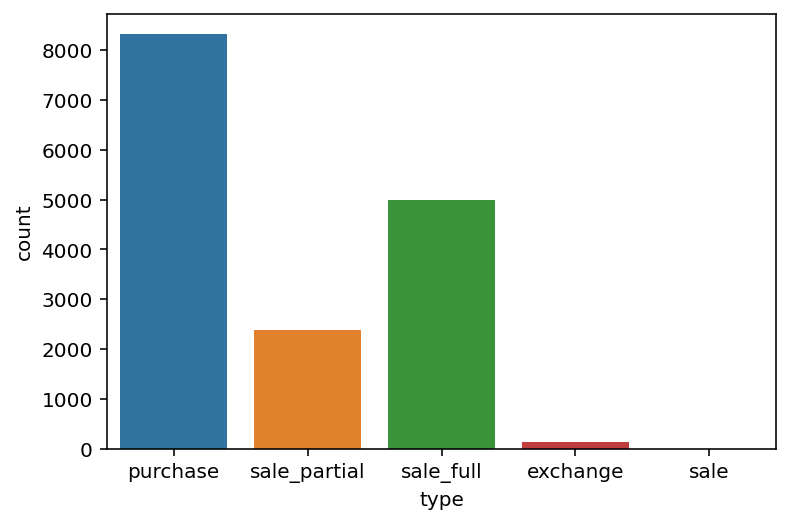

In [12]:
sns.countplot(data = finaldf, x = 'type')

finaldf['type'].value_counts()

We observe that the most common trade type is <b>purchase</b>, while there is only 1 complete <b>sale</b>. This one complete sale is:

In [13]:
only_full_sale = finaldf.loc[finaldf['type']=='sale']


This sale was undertaken by <b> Mo Brooks </b> on <b>2021-10-14</b> and it involved the sale of <b> "AT&T" </b> stock


Having seen this, we are now interested in what the most traded stocks are and the party affiliations associated with this trading behaviour

### 1) Top 10 most traded stocks

In [14]:
finaldf['ticker'].value_counts()[:10]

MSFT     268
AAPL     190
NTAP     141
TDDXX    122
FB       117
AMZN     107
BRK.B    101
TSLA      96
RUN       94
NVDA      93
Name: ticker, dtype: int64

The top 10 most traded stocks are as above. Using the data above we observe that the ticker <b> MSFT </b> representing the company <b> Microsoft </b> seems to be the most traded stock.

But was it bought equally by both parties or were more purchases performed by one over the other?

### 1) What was the party breakdown for the above stocks?

In [15]:
#finaldf.loc[finaldf['ticker']=="MSFT"].groupby('party').count().iloc[:,0]

top10_list = list(finaldf['ticker'].value_counts()[:10].index)

top10_df= finaldf.loc[finaldf['ticker'].isin(top10_list)]

party_wise_top10= top10_df.pivot_table(index = 'party', columns = 'ticker',aggfunc = 'size')
party_wise_top10

ticker,AAPL,AMZN,BRK.B,FB,MSFT,NTAP,NVDA,RUN,TDDXX,TSLA
party,,,,,,,,,,
D,122.0,42.0,61.0,80.0,209.0,3.0,60.0,94.0,122.0,61.0
No,4.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN
R,64.0,65.0,40.0,36.0,56.0,138.0,33.0,NaN,NaN,35.0


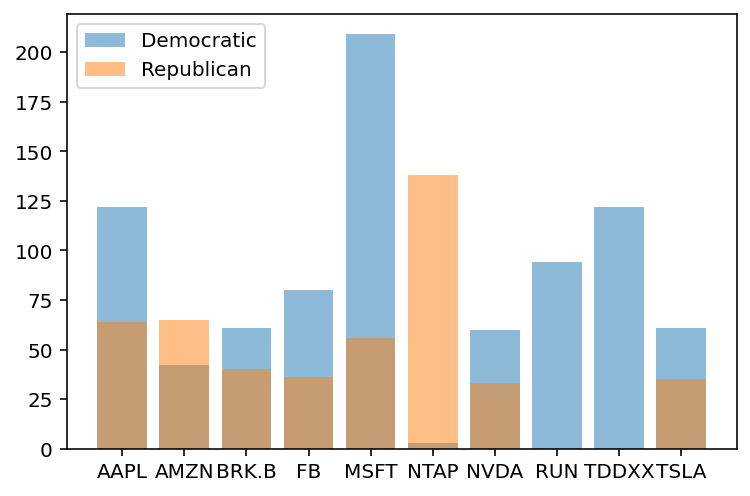

In [16]:
m = party_wise_top10.reset_index() #Resetting index for easy plotting 


p = m.loc[m['party'] == "D"].drop('party',axis = 1) ## Democratic Party
q = m.loc[m['party'] == "R"].drop('party',axis = 1) ## Republican party

p.columns
plt.bar(p.columns, p.values[0], alpha = 0.5)
plt.bar(q.columns,q.values[0], alpha = 0.5)
#p.values[0]
plt.legend(['Democratic', 'Republican'], loc='upper left')

In the above pivot table we can see the party wise breakdown of each of the stocks in out Top10 List. From the above table we can observe that most of the <b>Microsoft</b> Stock was bought by members from the Democratic Party. 
But most of the <b>NetApp Inc </b> stocks were bought members of the Republican party.

In fact what is more interesting is that, from _all_ the trading activity for the Top10 tickers, the Democratic Party is responsible for a majority of the trades. 

In [17]:
D_perc = party_wise_top10.sum(axis =1)[0]/ 1314
R_perc = party_wise_top10.sum(axis =1)[-1]/1314

{"Republican Trades in Top10": R_perc, "Democratic Trades in Top10": D_perc}

{'Republican Trades in Top10': 0.3554033485540335,
 'Democratic Trades in Top10': 0.649923896499239}

### Which Party made the most overall trades?

As seen above, the democratic Party is responsible for almost <b>63.8%</b> of the Stock trades in the Top10 most traded stocks in our dataset.

However is this true for the entire datset or just the Top10 stocks? Let us caluclate the percentage breakdown for all the stocks below:

In [18]:
party_wise_total= finaldf.pivot_table(index = 'party', columns = 'ticker',aggfunc = 'size')

D_perc2 = party_wise_total.sum(axis =1)[0]/ 14414
R_perc2 = party_wise_total.sum(axis =1)[-1]/14414

{"Republican Trades in DataSet": R_perc2, "Democratic Trades in DataSet": D_perc2}

{'Republican Trades in DataSet': 0.4089080061051755,
 'Democratic Trades in DataSet': 0.5709726654641321}

Even in the dataset as a whole, it appears as though the Democratic Party has made <b>56%</b> of all trades, while the Republican Party has made only around <b>40.8%</b> of trades.

All this information allows us to understand the trading habits of members of various parties. However from background research, we notice that the stock for <b> Tesla </b> has grown significantly from the year 2022 to present. This period coincides exactly with the time periods of our DataSet. We will be investigating the trading behaviour of representatives in relation to this stock and if there is evidence of insider trading?


## Research Question: 

### _"Are the Trading Habits the stocks of <b> Tesla </b> is different across parties in the House of Representatives from 2020-2022?"_

Before we can begin exploring this question, we must assess the missingness mechanisms in our data and look for any cases of MAR data.

## Assessment of Missingness

We will now analyse the missing values within the dataset to assess the kind of missingness they exhibit.

In [19]:
finaldf.isna().sum()

disclosure_year              0
disclosure_date              0
transaction_date             7
owner                     7367
ticker                    1314
asset_description            4
type                         0
amount                       0
representative               0
district                     0
ptr_link                     0
cap_gains_over_200_usd       0
party                        0
dtype: int64

Using the above piece of code, we observe that there are 2 columns that contain a nontrivial amount of missingness, namely, <b> owner </b> and <b> ticker </b> . Therefore we will assess the kind of missingness mechanisms describe these columns. In order to asses whether they are Missing at Random (MAR) or Not Missing at Random (NMAR) we will undertake permutation tests. These tests will determine if the missing values are relating to value present in some other columns.

### Permuation 1

### Null Hyp1: Missingness in 'Ticker' depends on the values in 'Type'
The first permutation test will compare the missingness in <b>ticker</b> with the values in the <b>type</b> column.

The test statistic used in this test will be the Total Variation Distance(TVD) of the categories in the column.We chose this statistic due the fact that the <b>type</b> column represents a categorical distirbution.

The missingness in <b>ticker</b> as broken down by the <b>type</b> can be seen in this pivot table below:

In [20]:
new = finaldf #Temporary DataFrame to perform Permutation tests

new['ticker_missing'] = new['ticker'].isna() #Column of Boolean values indicating missingness in Ticker

ticker_type_pivot = new.pivot_table(index = 'ticker_missing', columns = 'type', aggfunc = 'size') #Creates a pivot table to view the breakdown of missing values by type

ticker_type_pivot = ticker_type_pivot.apply(lambda x: x / x.sum(), axis=1) #Normalizes values in the pivot table

ticker_type_pivot

type,exchange,purchase,sale,sale_full,sale_partial
ticker_missing,,,,,
False,0.007371,0.521425,0.000069,0.312758,0.158377
True,0.024353,0.570776,NaN,0.339422,0.065449


The observed TVD can then be calculated as follows:

In [21]:
obs_tvd_1 = ticker_type_pivot.diff().sum().abs().iloc[-1]
obs_tvd_1

0.09292795269629522

Using a permutation test we will shuffle the missingness of ticker to generate a distribution of our test statisitc. This is observed below:

In [22]:
n_repetitions = 5000
null_dist1 = [] #NULL DISTRIBUTION

for _ in range(n_repetitions):
    
    new['shuffled_missing_ticker'] = np.random.permutation(new['ticker_missing']) #SHUFFLES MISSINGNESS COLUMN
    
    pivoted = (new.pivot_table(index='shuffled_missing_ticker', columns = 'type', aggfunc='size').apply(lambda x: x / x.sum(), axis=1))
    ###CREATES A NORMALIZED PIVOT TABLE###
    
    shuff_tvd1 = pivoted.diff().iloc[-1].abs().sum() / 2 # CALCULATES THE TVD
    null_dist1.append(shuff_tvd1) #APPENDS THE NEW TVD INTO THE NULL DISTRIBUTION


Now that we have our Null Distribution we can calculate the p-value to assess the missingness

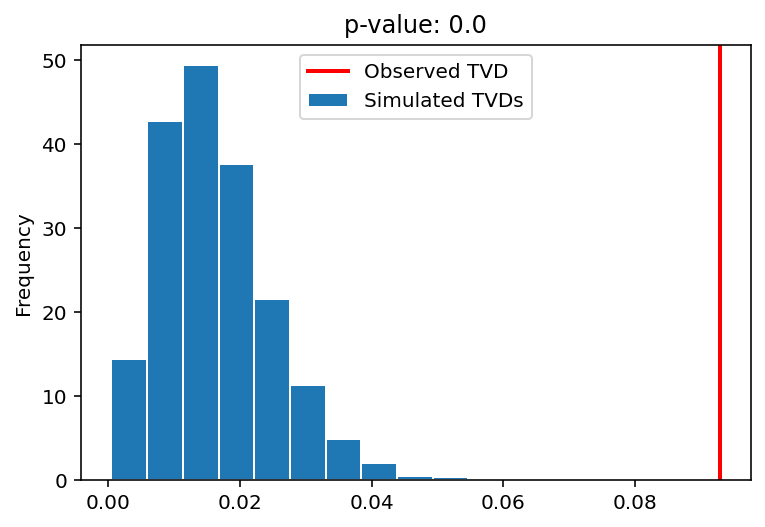

In [23]:
pval1 = np.mean(null_dist1 >= obs_tvd_1)

pd.Series(null_dist1).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval1}', label='Simulated TVDs')
plt.axvline(x= obs_tvd_1, color='red', linewidth=2, label='Observed TVD')
plt.legend();




The distribution above indicates that our pvalue is very close to 0. Given such a low pvalue we can say that:

We <b>_reject the null hypothesis_ </b> and conclude that missingness in <b> ticker </b> is not dependant on values in <b> type </b> 




### Permuation 2

### Null Hyp2: Missingness in 'Ticker' depends on the values in 'Disclosure Year'
This permutation test will compare the missingness in <b>ticker</b> with the values in the <b>disclosure_year</b> column.

The test statistic used in this test will also be the Total Variation Distance (TVD) of the categories in the column. We chose this statistic due the fact that the <b>type</b> column represents a categorical distirbution.

The missingness in <b>ticker</b> as broken down by the <b>disclosure_year</b> can be seen in this pivot table below:

In [24]:
new = finaldf #Temporary DataFrame to perform Permutation tests

new['ticker_missing'] = new['ticker'].isna() #Column of Boolean values indicating missingness in Ticker

ticker_year_pivot = new.pivot_table(index = 'ticker_missing', columns = 'disclosure_year', aggfunc = 'size') #Creates a pivot table to view the breakdown of missing values by type

ticker_year_pivot = ticker_year_pivot.apply(lambda x: x / x.sum(), axis=1) #Normalizes values in the pivot table

ticker_year_pivot

disclosure_year,2020,2021,2022
ticker_missing,,,
False,0.466657,0.349063,0.184279
True,0.373668,0.424658,0.201674


The observed TVD can then be calculated as follows:

In [25]:
obs_tvd_2 = ticker_year_pivot.diff().sum().abs().iloc[-1]
obs_tvd_2

0.017394861199713285

Using a permutation test we will shuffle the missingness of ticker to generate a distribution of our test statisitc. This is observed below:

In [26]:
n_repetitions = 5000
null_dist2 = [] #NULL DISTRIBUTION

for _ in range(n_repetitions):
    
    new['shuffled_missing_ticker'] = np.random.permutation(new['ticker_missing']) #SHUFFLES MISSINGNESS COLUMN
    
    pivoted = (new.pivot_table(index='shuffled_missing_ticker', columns = 'disclosure_year', aggfunc='size').apply(lambda x: x / x.sum(), axis=1))
    ###CREATES A NORMALIZED PIVOT TABLE###
    
    shuff_tvd2 = pivoted.diff().iloc[-1].abs().sum() / 2 # CALCULATES THE TVD
    null_dist2.append(shuff_tvd2) #APPENDS THE NEW TVD INTO THE NULL DISTRIBUTION

Now that we have our Null Distribution we can calculate the p-value to assess the missingness

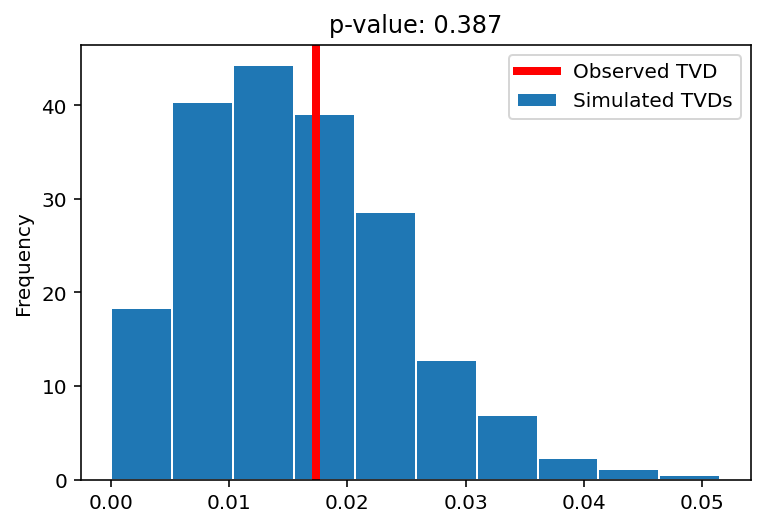

In [27]:
pval2 = np.mean(null_dist2 >= obs_tvd_2)

pd.Series(null_dist2).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval2}', label='Simulated TVDs')
plt.axvline(x= obs_tvd_2, color='red', linewidth=4, label='Observed TVD')
plt.legend();


The distribution above indicates that our pvalue is 0.6228 . Given such a pvalue we can say that:

We <b>_fail to reject the null hypothesis_ </b> and conclude that missingness in <b> ticker </b> is dependant on <b> disclosure_year </b>

### Permuation 3

### Null Hyp3: Missingness in 'Owner' depends on the values in 'Type'

This permutation test will compare the missingness in <b>owner</b> with the values in the <b>type</b> column.

The test statistic used in this test will be the Total Variation Distance(TVD) of the categories in the <b>type</b> column.We chose this statistic due the fact that the <b>type</b> column represents a categorical distirbution.

The missingness in <b>owner</b> as broken down by the <b>type</b> can be seen in this pivot table below:

In [28]:
new = finaldf #Temporary DataFrame to perform Permutation tests

new['owner_missing'] = new['owner'].isna() #Column of Boolean values indicating missingness in Ticker

owner_type_pivot = new.pivot_table(index = 'owner_missing', columns = 'type', aggfunc = 'size') #Creates a pivot table to view the breakdown of missing values by type

owner_type_pivot = owner_type_pivot.apply(lambda x: x / x.sum(), axis=1) #Normalizes values in the pivot table

owner_type_pivot

type,exchange,purchase,sale,sale_full,sale_partial
owner_missing,,,,,
False,0.007562,0.552641,0.000118,0.281224,0.158454
True,0.010181,0.494367,NaN,0.353740,0.141713


The observed TVD can then be calculated as follows:

In [29]:
obs_tvd_3 = owner_type_pivot.diff().sum().abs().iloc[-1]
obs_tvd_3

0.01674140411841668

Using a permutation test we will shuffle the missingness of owner to generate a distribution of our test statisitc. This is observed below:

In [30]:
n_repetitions = 5000
null_dist3 = [] #NULL DISTRIBUTION

for _ in range(n_repetitions):
    
    new['shuffled_missing_owner'] = np.random.permutation(new['owner_missing']) #SHUFFLES MISSINGNESS COLUMN
    
    pivoted = (new.pivot_table(index='shuffled_missing_owner', columns = 'type', aggfunc='size').apply(lambda x: x / x.sum(), axis=1))
    ###CREATES A NORMALIZED PIVOT TABLE###
    
    shuff_tvd3 = pivoted.diff().iloc[-1].abs().sum() / 2 # CALCULATES THE TVD
    null_dist3.append(shuff_tvd3) #APPENDS THE NEW TVD INTO THE NULL DISTRIBUTION

Now that we have our Null Distribution we can calculate the p-value to assess the missingness

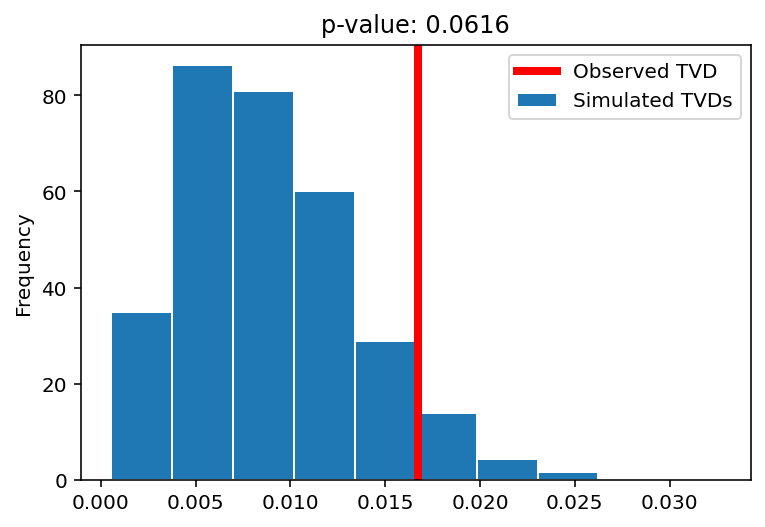

In [31]:
pval3 = np.mean(null_dist3 >= obs_tvd_3)

pd.Series(null_dist3).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval3}', label='Simulated TVDs')
plt.axvline(x= obs_tvd_3, color='red', linewidth=4, label='Observed TVD')
plt.legend();


The distribution above indicates that our pvalue is 0.0842 . Given such a pvalue under a 95% confidence interval, we can say that:

We <b>_fail to reject the null hypothesis_ </b> and conclude that missingness in <b> owner </b> is dependant on <b> type </b>

### Permuation 4

### Null Hyp4: Missingness in 'Owner' depends on the values in 'Year'

This permutation test will compare the missingness in <b>owner</b> with the values in the <b>year</b> column.

The test statistic used in this test will be the Total Variation Distance(TVD) of the categories in the <b>type</b> column.We chose this statistic due the fact that the <b>type</b> column represents a categorical distirbution.

The missingness in <b>owner</b> as broken down by the <b>year</b> can be seen in this pivot table below:

In [32]:
new = finaldf #Temporary DataFrame to perform Permutation tests

new['owner_missing'] = new['owner'].isna() #Column of Boolean values indicating missingness in Ticker

owner_year_pivot = new.pivot_table(index = 'owner_missing', columns = 'disclosure_year', aggfunc = 'size') #Creates a pivot table to view the breakdown of missing values by year

owner_year_pivot = owner_year_pivot.apply(lambda x: x / x.sum(), axis=1) #Normalizes values in the pivot table

owner_year_pivot

disclosure_year,2020,2021,2022
owner_missing,,,
False,0.418646,0.390878,0.190476
True,0.505226,0.314511,0.180263


In [33]:
obs_tvd_4 = owner_year_pivot.diff().sum().abs().iloc[-1]
obs_tvd_4

0.010212853975579639

Using a permutation test we will shuffle the missingness of owner to generate a distribution of our test statisitc. This is observed below:

In [34]:
n_repetitions = 5000
null_dist4 = [] #NULL DISTRIBUTION

for _ in range(n_repetitions):
    
    new['shuffled_missing_owner'] = np.random.permutation(new['owner_missing']) #SHUFFLES MISSINGNESS COLUMN
    
    pivoted = (new.pivot_table(index='shuffled_missing_owner', columns = 'type', aggfunc='size').apply(lambda x: x / x.sum(), axis=1))
    ###CREATES A NORMALIZED PIVOT TABLE###
    
    shuff_tvd4 = pivoted.diff().iloc[-1].abs().sum() / 2 # CALCULATES THE TVD
    null_dist4.append(shuff_tvd4) #APPENDS THE NEW TVD INTO THE NULL DISTRIBUTION

Now that we have our Null Distribution we can calculate the p-value to assess the missingness

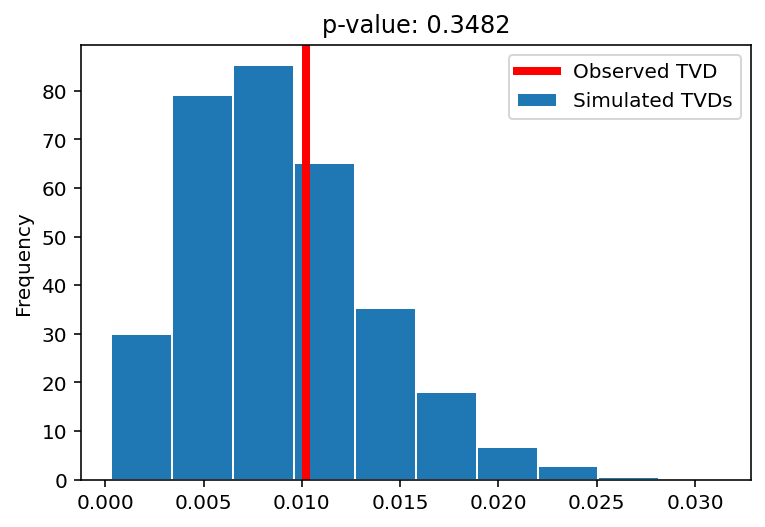

In [35]:
pval4 = np.mean(null_dist4 >= obs_tvd_4)

pd.Series(null_dist4).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval4}', label='Simulated TVDs')
plt.axvline(x= obs_tvd_4, color='red', linewidth=4, label='Observed TVD')
plt.legend();

The distribution above indicates that our pvalue is 0.996 . Given such a pvalue under a 95% confidence interval, we can say that:

We <b>_fail to reject the null hypothesis_ </b> and conclude that missingness in <b> owner </b> is dependant on <b> year </b>

Having conducted this analysis we can assume that owner and ticker may be dependant on other columns like year and type. However we will refrain from imputing values in this exploration as the missing values do not really affect the columns that we require for our analysis of tesla

### Hypothesis Test / Permutation Test

Our Research Question is <b>_"Are the Trading Habits the stocks of Tesla is different across parties in the House of Representatives from 2020-2022?"_</b>


In order to test "trading habits" we chose a certain measure: 

i.e <b>_probablity of a party trading the stock_</b> 

We then use permutation tests for whether there is a significant difference in these measures.

To test the first measure, we set the following hypotheses:
### Null Hypothesis : 

<b> _" Republican Party representatives are just as likely to trade Tesla stock as representatives from the Democratic Party"_</b>

### Alternate Hypothesis:

<b> _"Representatives from the Republican Party trade Tesla stock at a different probability than those of the Democratic Party"_</b>

0.80407

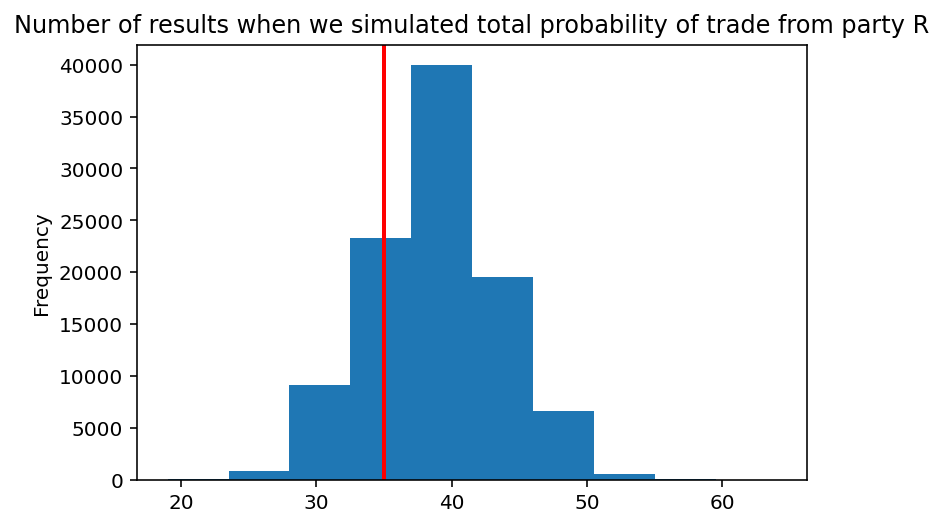

In [46]:
tesla_bool= finaldf["asset_description"].str.contains("Tesla") ## FILTERING ALL TESLA STOCK TRADES
tesladf = finaldf[tesla_bool==True].reset_index(drop=True) ## DATA FRAME OF TESLA TRADES
tesladf['null_d'] = (tesladf['party'] == "D" )

countR = []
countD = []
for i in tesladf["type"].unique():
    countR.append(tesladf[(tesladf["party"] == "R")&(tesladf["type"]==i)]["type"].count())
    countD.append(tesladf[(tesladf["party"] == "D")&(tesladf["type"]==i)]["type"].count())
tesladf_final = pd.DataFrame(data = [countR,countD],index = ["R","D"],columns= tesladf["type"].unique())

R = (finaldf["party"] == "R").sum()/((finaldf["party"] == "R").sum()+(finaldf["party"] == "D").sum())
D = 1-R

total = 35+58
prob = pd.DataFrame(tesladf_final.T.sum())/total  ##CALUCLATES THE RATE OF TRADE OR PROBABLITY THAT A PARTY MEMBER TRADES TESLA STOCK
prob[0]

#### PERMUTATION PROCESS 100,000 REPETITIONS
results = []
for _ in range(100000):
    simulation = np.random.choice(["R","D"],p = [R,D],size = total)
    simulationR = (simulation=="R").sum()
    results.append(simulationR)
pd.Series(results).plot(kind = "hist",title = "Number of results when we simulated total probability of trade from party R")
obs = 35
plt.axvline(x=obs,color = "red", linewidth = 2)
pval = (np.array(results)>=obs).mean()
pval # higher than 0.05 so do not reject the null

In [44]:
prob

,0
R,0.376344
D,0.655914


In [43]:
tesladf

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,party,ticker_missing,shuffled_missing_ticker,owner_missing,shuffled_missing_owner,null_d
0,2022,2022-02-18,2022-01-26,joint,TSLA,Tesla Inc,sale_partial,"$1,001 - $15,000",Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False,D,False,False,False,True,True
1,2022,2022-02-18,2022-01-31,joint,TSLA,Tesla Inc,sale_partial,"$1,001 - $15,000",Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False,D,False,False,False,False,True
2,2021,2021-09-08,2021-08-02,self,TSLA,Tesla Inc,purchase,"$1,001 - $15,000",Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False,D,False,False,False,False,True
3,2021,2021-09-08,2021-08-02,self,TSLA,Tesla Inc,sale_full,"$50,001 - $100,000",Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False,D,False,False,False,True,True
4,2021,2021-07-15,2021-06-04,joint,TSLA,Tesla Inc,sale_partial,"$1,001 - $15,000",Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False,D,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2021,2021-07-09,2021-06-02,self,TSLA,Tesla Inc,sale_full,"$1,001 - $15,000",Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False,D,False,True,False,False,True
92,2021,2021-07-09,2021-06-18,self,TSLA,Tesla Inc,sale_full,"$1,001 - $15,000",Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False,D,False,False,False,False,True
93,2020,2020-05-13,2020-04-17,joint,TSLA,"Tesla, Inc.",sale_partial,"$1,001 - $15,000",Josh Gottheimer,NJ05,https://disclosures-clerk.house.gov/public_dis...,False,D,False,False,False,True,True
94,2020,2020-07-16,2020-07-14,NaN,TSLA,"Tesla, Inc.",sale_partial,"$15,001 - $50,000",Thomas Massie,KY04,https://disclosures-clerk.house.gov/public_dis...,False,R,False,False,True,True,False


In [47]:
tesladf_final

,sale_partial,purchase,sale_full,exchange
R,8,19,7,1
D,17,23,21,0


In [45]:
tesladf_final

,sale_partial,purchase,sale_full,exchange
R,8,19,7,1
D,17,23,21,0


Given the pvalue of 0.8136 we <b> fail to reject </b> the null hypothesis, so it is possible that there is no significant difference between the probabilty of a Republican trading Tesla Stock compared to a Democrat

## Conclusion:

It appears as though we cannot reject the hypothesis that there is a no significant difference between the 2 parties for their likelihood to trade "Tesla" Stock.

We do require a much more in depth research into the party-wide trading habits to conclusively prove anything conclusively. However, from the measure of "probability to trade Tesla Stock" it appears as though we cannot reject the null. This however, may not be true for other stocks and so it is possible that there is still evidence of insider trading within trades by representatives.